In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df_data = pd.read_csv('./Data/train_sample.csv')

In [5]:
df_data.head()

,datetime,Frequency,FrequencyOutput,CurrentOutput,TempPV,TempSV,ai0,ai1,ai2,ai3,Scored
0,2019-02-14T13:57:06Z,8.0,8.0,0.03,33.5,51.6,0.031656,NaN,0.030848,0.016809,-1
1,2019-02-26T13:01:40Z,10.6,10.6,0.03,33.0,51.7,0.092703,0.135483,0.078958,0.003524,-1
2,2019-02-17T12:57:01Z,5.6,5.6,0.04,29.7,51.6,0.067807,0.070302,0.058287,0.003365,-1
3,2019-02-28T16:48:15Z,6.9,6.9,0.04,31.9,51.7,0.070707,0.059026,0.037287,0.021144,-1
4,2019-02-21T10:11:34Z,2.2,2.2,0.03,NaN,51.6,0.004294,0.024141,0.007992,0.011165,1


In [7]:
df_data = df_data.dropna()
df_data.isna().any()

datetime           False
Frequency          False
FrequencyOutput    False
CurrentOutput      False
TempPV             False
TempSV             False
ai0                False
ai1                False
ai2                False
ai3                False
Scored             False
dtype: bool

In [9]:
df_data["datetime"] = pd.to_datetime(df_data["datetime"])

In [12]:
df_data.dtypes

datetime           datetime64[ns, UTC]
Frequency                      float64
FrequencyOutput                float64
CurrentOutput                  float64
TempPV                         float64
TempSV                         float64
ai0                            float64
ai1                            float64
ai2                            float64
ai3                            float64
Scored                           int64
dtype: object

In [15]:
df_data_x = df_data[["Frequency", "FrequencyOutput", "TempPV", "TempSV"]]

In [16]:
df_data_y = df_data[["ai1"]]

In [18]:
X = df_data_x.values
y = df_data_y.values

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Random Forestには、feature scalingを実施する必要がある
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

r_forest = RandomForestRegressor(
            n_estimators=10,
            criterion='mse',
            random_state=1,
            n_jobs=-1
)

r_forest.fit(X_train, y_train)
y_train_pred = r_forest.predict(X_train)
y_test_pred = r_forest.predict(X_test)

/Users/andyaoao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [22]:
# check residue (mse)
train_resid = y_train - y_train_pred
RFR_mse_train = np.array([r ** 2 for r in train_resid]).mean()
test_resid = y_test - y_test_pred
RFR_mse_test = np.array([r ** 2 for r in test_resid]).mean()

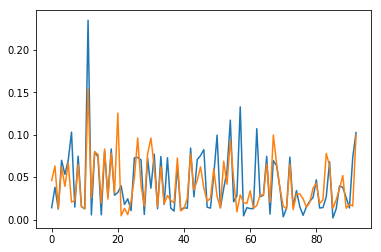

In [37]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()